### T-SNE

* t-SNE is a nonlinear embedding algorithm that is particularly adept at preserving points within clusters

In [9]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import sys
p = os.path.join(os.path.dirname('__file__'), '..')
sys.path.append(p)
from common import *
sns.set()

from scipy.stats import mode
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [11]:
# We know there are 10 digits
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

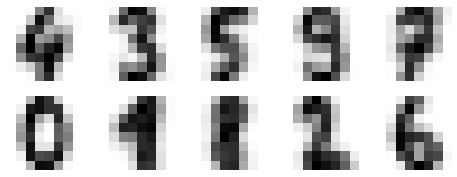

In [12]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [ ]:
# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

In [ ]:
# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [13]:
# Compute the accuracy
accuracy_score(digits.target, labels)

0.9326655537006121